In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

In [2]:
data = pd.read_csv("train.csv")


In [3]:
test = pd.read_csv("test.csv")

In [4]:
test_ID = test["Id"]

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.shape

(1460, 81)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
X = data.drop(labels = ["SalePrice","Id"], axis = 1)
y = data["SalePrice"]

In [9]:
X.isnull().mean().sort_values(ascending=False).head()

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:>

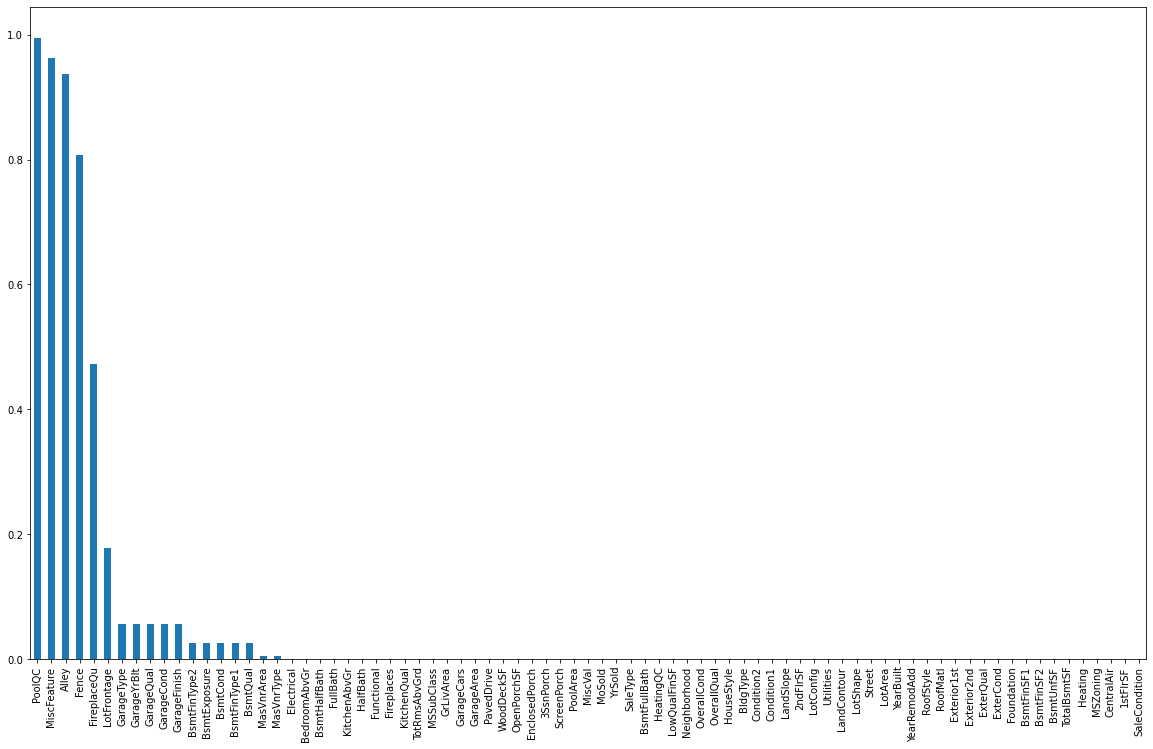

In [10]:
X.isnull().mean().sort_values(ascending=False).plot.bar(figsize=(20,12))

In [11]:
def draw(df,var):
    plt.figure(figsize=(20,12))
    plt.subplot(1,3,1)
    sns.histplot(df[var], kde=True)
    
    plt.subplot(1,3,2)
    stats.probplot(df[var].dropna(),dist="norm", plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[var])

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


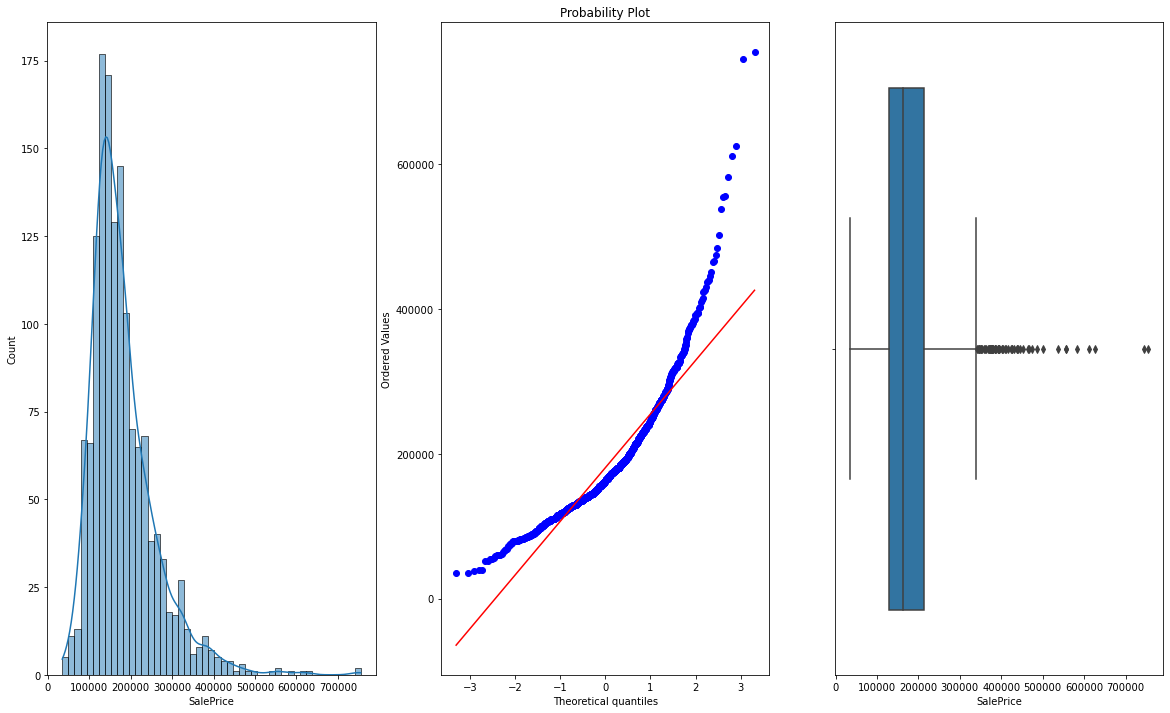

In [12]:
draw(data,"SalePrice")

In [13]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


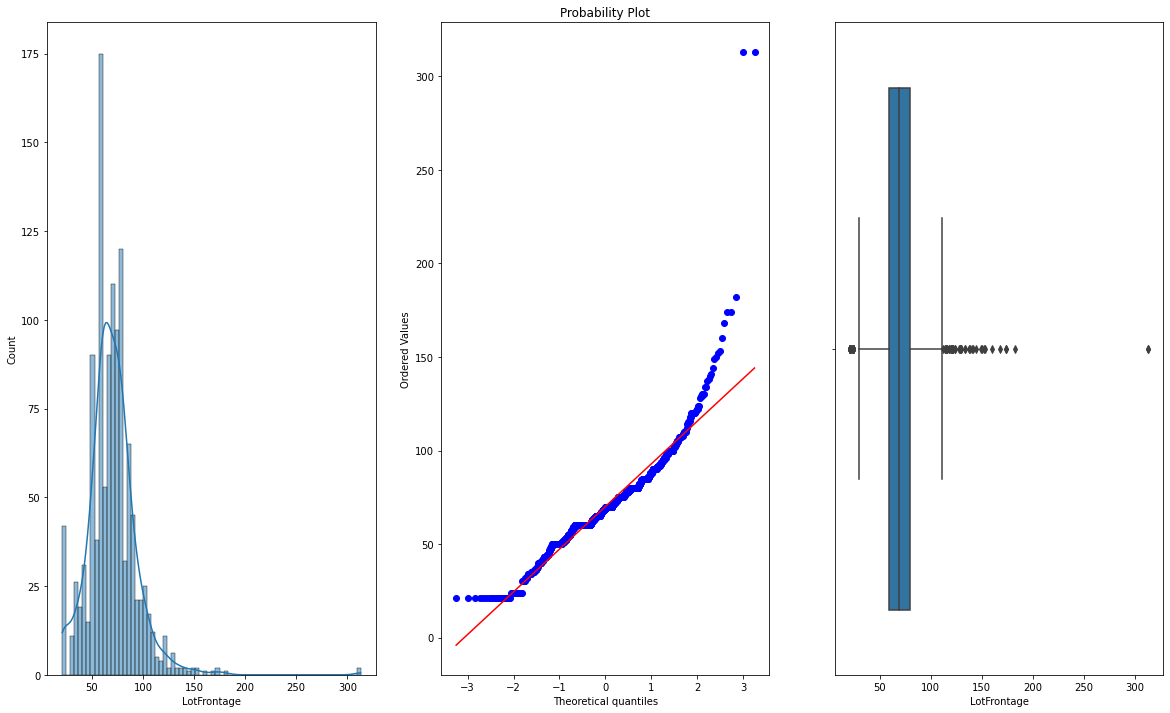

In [14]:
draw(X,'LotFrontage')

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


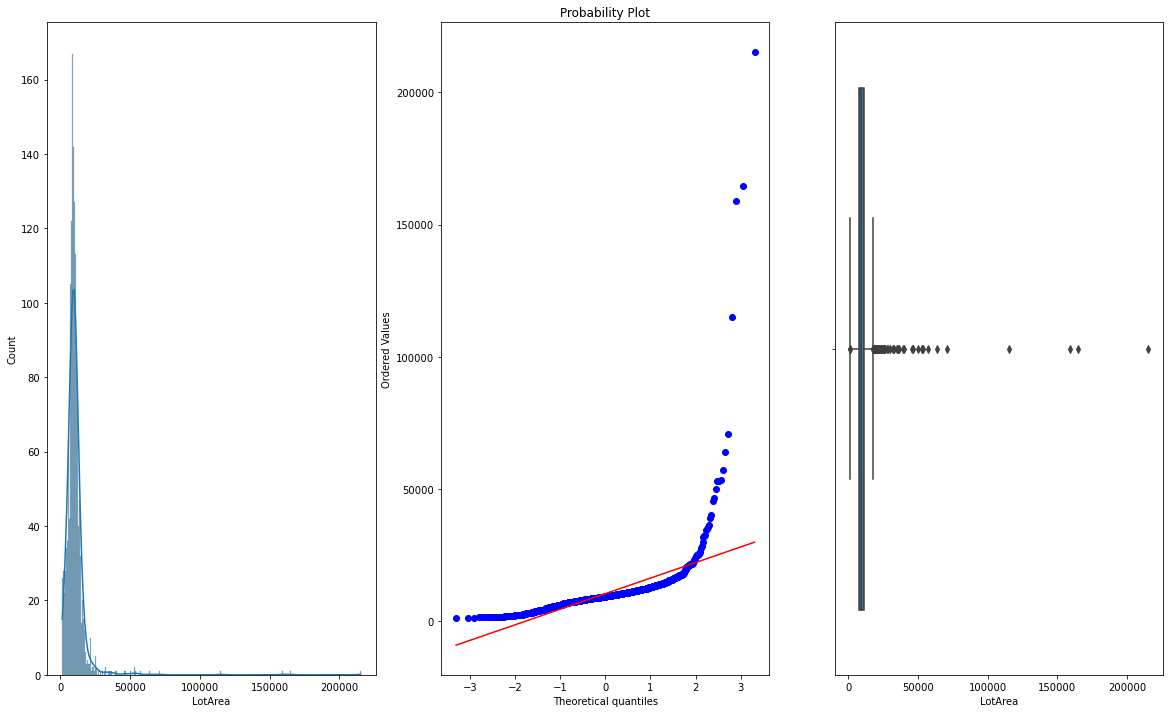

In [15]:
draw(X,'LotArea')

<AxesSubplot:>

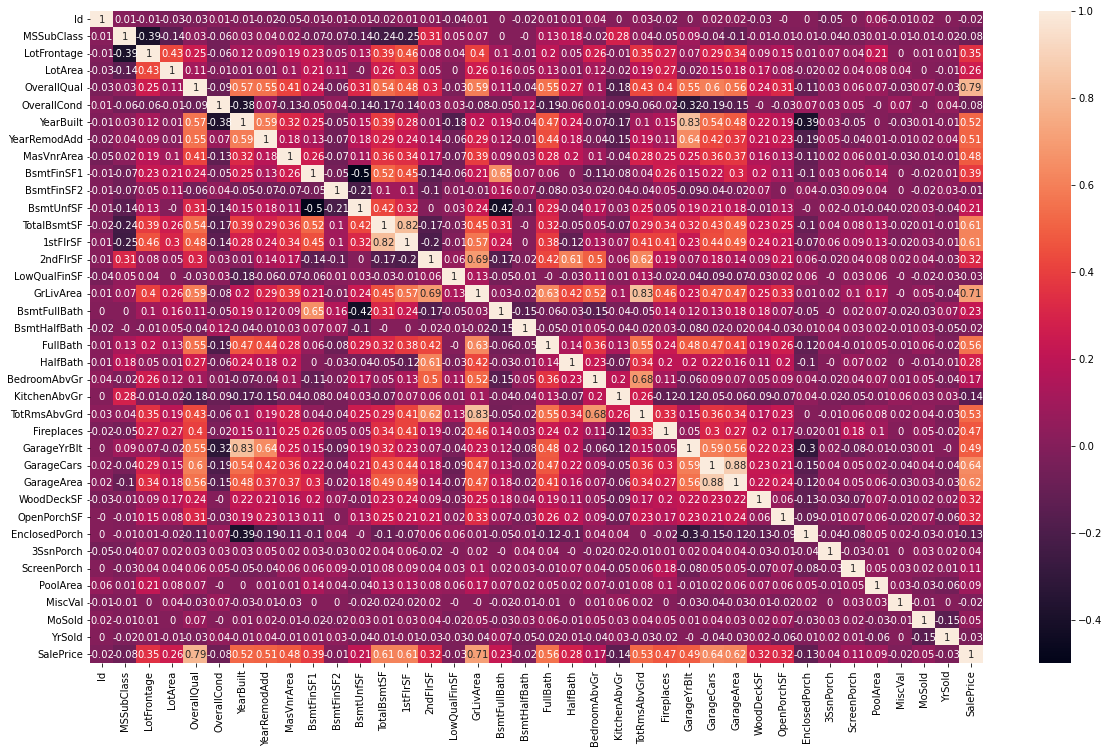

In [16]:
corr_matrix = data.corr().round(2)
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, annot=True)

In [17]:
def outlier(df, var):
    IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
    upper = df[var].quantile(0.75) + 3*IQR
    lower = df[var].quantile(0.25) - 3*IQR 
    return upper, lower   

In [18]:
upper_SalePrice, lower_SalePrice = outlier(data, "SalePrice")
price = np.where(data["SalePrice"] > upper_SalePrice, True, np.where(data["SalePrice"] < lower_SalePrice, True, False)) 

In [19]:
upper_lot, lower_lot = outlier(data, "LotFrontage")
lot = np.where(data['LotFrontage'] > upper_lot, True, np.where(data['LotFrontage'] < lower_lot, True, False)) 

In [20]:
data = data.loc[~(price + lot),:]

In [21]:
data.shape

(1437, 81)

In [22]:
X = data.drop(["SalePrice","Id"], axis=1)
y = data["SalePrice"]

In [23]:
missing_cols_group1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 
                       'FireplaceQu', 'MSSubClass', 'GarageType', 
                       'GarageFinish', 'GarageQual', 'GarageCond',"MasVnrType"]
# fill 0
missing_cols_group3 = ['GarageYrBlt', 'GarageArea', 'GarageCars', 
                       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',"MasVnrArea"]
# fill none
missing_cols_group4 = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
# fill mode
missing_cols_group5 = ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities',"MSZoning"]


In [24]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
missing = ColumnTransformer(transformers=[ 
    ("group1",SimpleImputer(strategy="constant", fill_value="None"), missing_cols_group1) ,          
    ("group3",SimpleImputer(strategy="constant", fill_value=0), missing_cols_group3) , 
    ("group4",SimpleImputer(strategy="constant", fill_value="None"), missing_cols_group4),
    ("group2",SimpleImputer(strategy="most_frequent"), missing_cols_group5)                     
                                          ])

In [25]:
labels= missing_cols_group1 + missing_cols_group3 + missing_cols_group4 + missing_cols_group5

In [26]:
missing.fit(X)

ColumnTransformer(transformers=[('group1',
                                 SimpleImputer(fill_value='None',
                                               strategy='constant'),
                                 ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
                                  'FireplaceQu', 'MSSubClass', 'GarageType',
                                  'GarageFinish', 'GarageQual', 'GarageCond',
                                  'MasVnrType']),
                                ('group3',
                                 SimpleImputer(fill_value=0,
                                               strategy='constant'),
                                 ['GarageYrBlt', 'GarageArea', 'GarageCars',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                                  'MasVnrArea']),
                                ('group4',
                                 SimpleIm

In [27]:
X_2 = missing.transform(X)

In [28]:
X_train = pd.DataFrame(X_2, columns= labels)

In [29]:
X_train.isnull().sum()

PoolQC          0
MiscFeature     0
Alley           0
Fence           0
FireplaceQu     0
MSSubClass      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
MasVnrType      0
GarageYrBlt     0
GarageArea      0
GarageCars      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Exterior1st     0
Exterior2nd     0
SaleType        0
Utilities       0
MSZoning        0
dtype: int64

In [30]:
X_test_nomissing = pd.DataFrame(missing.transform(test),columns= labels)

In [31]:
X_train

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,MSSubClass,GarageType,GarageFinish,GarageQual,GarageCond,...,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Exterior1st,Exterior2nd,SaleType,Utilities,MSZoning
0,None,None,None,None,None,60,Attchd,RFn,TA,TA,...,No,GLQ,Unf,SBrkr,Gd,VinylSd,VinylSd,WD,AllPub,RL
1,None,None,None,None,TA,20,Attchd,RFn,TA,TA,...,Gd,ALQ,Unf,SBrkr,TA,MetalSd,MetalSd,WD,AllPub,RL
2,None,None,None,None,TA,60,Attchd,RFn,TA,TA,...,Mn,GLQ,Unf,SBrkr,Gd,VinylSd,VinylSd,WD,AllPub,RL
3,None,None,None,None,Gd,70,Detchd,Unf,TA,TA,...,No,ALQ,Unf,SBrkr,Gd,Wd Sdng,Wd Shng,WD,AllPub,RL
4,None,None,None,None,TA,60,Attchd,RFn,TA,TA,...,Av,GLQ,Unf,SBrkr,Gd,VinylSd,VinylSd,WD,AllPub,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,None,None,None,None,TA,60,Attchd,RFn,TA,TA,...,No,Unf,Unf,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RL
1433,None,None,None,MnPrv,TA,20,Attchd,Unf,TA,TA,...,No,ALQ,Rec,SBrkr,TA,Plywood,Plywood,WD,AllPub,RL
1434,None,Shed,None,GdPrv,Gd,70,Attchd,RFn,TA,TA,...,No,GLQ,Unf,SBrkr,Gd,CemntBd,CmentBd,WD,AllPub,RL
1435,None,None,None,None,None,20,Attchd,Unf,TA,TA,...,Mn,GLQ,Rec,FuseA,Gd,MetalSd,MetalSd,WD,AllPub,RL


In [32]:
X_test_nomissing

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,MSSubClass,GarageType,GarageFinish,GarageQual,GarageCond,...,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Exterior1st,Exterior2nd,SaleType,Utilities,MSZoning
0,None,None,None,MnPrv,None,20,Attchd,Unf,TA,TA,...,No,Rec,LwQ,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RH
1,None,Gar2,None,None,None,20,Attchd,Unf,TA,TA,...,No,ALQ,Unf,SBrkr,Gd,Wd Sdng,Wd Sdng,WD,AllPub,RL
2,None,None,None,MnPrv,TA,60,Attchd,Fin,TA,TA,...,No,GLQ,Unf,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RL
3,None,None,None,None,Gd,60,Attchd,Fin,TA,TA,...,No,GLQ,Unf,SBrkr,Gd,VinylSd,VinylSd,WD,AllPub,RL
4,None,None,None,None,None,120,Attchd,RFn,TA,TA,...,No,ALQ,Unf,SBrkr,Gd,HdBoard,HdBoard,WD,AllPub,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,None,None,None,None,160,None,None,None,None,...,No,Unf,Unf,SBrkr,TA,CemntBd,CmentBd,WD,AllPub,RM
1455,None,None,None,None,None,160,CarPort,Unf,TA,TA,...,No,Rec,Unf,SBrkr,TA,CemntBd,CmentBd,WD,AllPub,RM
1456,None,None,None,None,TA,20,Detchd,Unf,TA,TA,...,No,ALQ,Unf,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RL
1457,None,Shed,None,MnPrv,None,85,None,None,None,None,...,Av,GLQ,Unf,SBrkr,TA,HdBoard,Wd Shng,WD,AllPub,RL


In [33]:
X['LotFrontage'] = X.groupby("Neighborhood")['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [34]:
test['LotFrontage'] = test.groupby("Neighborhood")['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [35]:
non_label = list(set(X.columns) -set(labels))

In [36]:
(X[non_label].isnull().sum() > 0).sum()

0

In [37]:
X_train_nomissing_2= pd.concat([X_train.reset_index(), X[non_label].reset_index()], axis=1)

In [38]:
X_train_nomissing_2

,index,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,MSSubClass,GarageType,GarageFinish,GarageQual,...,LowQualFinSF,MiscVal,Street,RoofStyle,GrLivArea,LotConfig,CentralAir,LandContour,YrSold,OverallCond
0,0,None,None,None,None,None,60,Attchd,RFn,TA,...,0,0,Pave,Gable,1710,Inside,Y,Lvl,2008,5
1,1,None,None,None,None,TA,20,Attchd,RFn,TA,...,0,0,Pave,Gable,1262,FR2,Y,Lvl,2007,8
2,2,None,None,None,None,TA,60,Attchd,RFn,TA,...,0,0,Pave,Gable,1786,Inside,Y,Lvl,2008,5
3,3,None,None,None,None,Gd,70,Detchd,Unf,TA,...,0,0,Pave,Gable,1717,Corner,Y,Lvl,2006,5
4,4,None,None,None,None,TA,60,Attchd,RFn,TA,...,0,0,Pave,Gable,2198,FR2,Y,Lvl,2008,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1432,None,None,None,None,TA,60,Attchd,RFn,TA,...,0,0,Pave,Gable,1647,Inside,Y,Lvl,2007,5
1433,1433,None,None,None,MnPrv,TA,20,Attchd,Unf,TA,...,0,0,Pave,Gable,2073,Inside,Y,Lvl,2010,6
1434,1434,None,Shed,None,GdPrv,Gd,70,Attchd,RFn,TA,...,0,2500,Pave,Gable,2340,Inside,Y,Lvl,2010,9
1435,1435,None,None,None,None,None,20,Attchd,Unf,TA,...,0,0,Pave,Hip,1078,Inside,Y,Lvl,2010,6


In [39]:
X_test_nomissing_2 = pd.concat([X_test_nomissing.reset_index(), test[non_label].reset_index()],axis=1)

In [40]:
X_test_nomissing

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,MSSubClass,GarageType,GarageFinish,GarageQual,GarageCond,...,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Exterior1st,Exterior2nd,SaleType,Utilities,MSZoning
0,None,None,None,MnPrv,None,20,Attchd,Unf,TA,TA,...,No,Rec,LwQ,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RH
1,None,Gar2,None,None,None,20,Attchd,Unf,TA,TA,...,No,ALQ,Unf,SBrkr,Gd,Wd Sdng,Wd Sdng,WD,AllPub,RL
2,None,None,None,MnPrv,TA,60,Attchd,Fin,TA,TA,...,No,GLQ,Unf,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RL
3,None,None,None,None,Gd,60,Attchd,Fin,TA,TA,...,No,GLQ,Unf,SBrkr,Gd,VinylSd,VinylSd,WD,AllPub,RL
4,None,None,None,None,None,120,Attchd,RFn,TA,TA,...,No,ALQ,Unf,SBrkr,Gd,HdBoard,HdBoard,WD,AllPub,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,None,None,None,None,160,None,None,None,None,...,No,Unf,Unf,SBrkr,TA,CemntBd,CmentBd,WD,AllPub,RM
1455,None,None,None,None,None,160,CarPort,Unf,TA,TA,...,No,Rec,Unf,SBrkr,TA,CemntBd,CmentBd,WD,AllPub,RM
1456,None,None,None,None,TA,20,Detchd,Unf,TA,TA,...,No,ALQ,Unf,SBrkr,TA,VinylSd,VinylSd,WD,AllPub,RL
1457,None,Shed,None,MnPrv,None,85,None,None,None,None,...,Av,GLQ,Unf,SBrkr,TA,HdBoard,Wd Shng,WD,AllPub,RL


In [41]:
category = [x for x in X.columns if X[x].dtypes == "O"]

In [42]:
category

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [43]:
num = [x for x in X.columns if X[x].dtypes != "O"]

In [44]:
num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [45]:
print(len(category))
print(len(num))

43
36


In [46]:
print(len(X.columns))

79


In [47]:
def label_encoding(x,label):
    return label.index(x)

In [48]:
labels_1 = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
labels_columns_1 = ['BsmtQual', 'BsmtCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'PoolQC']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding
for col in labels_columns_1:
    X_train_nomissing_2[col] = X_train_nomissing_2[col].apply(lambda x:label_encoding(x, labels_1))
    X_test_nomissing_2[col] = X_test_nomissing_2[col].apply(lambda x:label_encoding(x, labels_1))


In [49]:
X_train_nomissing_2[labels_columns_1].head()

,BsmtQual,BsmtCond,ExterQual,ExterCond,HeatingQC,KitchenQual,PoolQC
0,4,3,4,3,5,4,0
1,4,3,3,3,5,3,0
2,4,3,4,3,5,4,0
3,3,4,3,3,4,4,0
4,4,3,4,3,5,4,0


In [50]:
X_test_nomissing_2[labels_columns_1].head()

,BsmtQual,BsmtCond,ExterQual,ExterCond,HeatingQC,KitchenQual,PoolQC
0,3,3,3,3,3,3,0
1,3,3,3,3,3,4,0
2,4,3,3,3,4,3,0
3,3,3,3,3,5,4,0
4,4,3,4,3,5,4,0


In [51]:
labels_2 = ['None', 'No', 'Mn', 'Av', 'Gd']
labels_columns_2 = ['BsmtExposure']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding
for col in labels_columns_2:
    X_train_nomissing_2[col] = X_train_nomissing_2[col].apply(lambda x:label_encoding(x,labels_2))
    X_test_nomissing_2[col] = X_test_nomissing_2[col].apply(lambda x:label_encoding(x,labels_2))

In [52]:
labels_3 = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
labels_columns_3 = ['BsmtFinType1', 'BsmtFinType2']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding
for col in labels_columns_3:
    X_train_nomissing_2[col] = X_train_nomissing_2[col].apply(lambda x:label_encoding(x,labels_3))
    X_test_nomissing_2[col] = X_test_nomissing_2[col].apply(lambda x:label_encoding(x,labels_3))

In [53]:
labels_4 = ['N', 'Y']
labels_columns_4 = ['CentralAir']

labels_5 = ['None', 'Unf', 'RFn', 'Fin']
labels_columns_5 = ['GarageFinish']

labels_6 = ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
labels_columns_6 = ['Fence']

## PUT YOUR CODE HERE:
# mã hóa số nguyên bằng cách sử dụng hàm label_encoding
for col in labels_columns_4:
    X_train_nomissing_2[col] = X_train_nomissing_2[col].apply(lambda x:label_encoding(x,labels_4))
    X_test_nomissing_2[col] = X_test_nomissing_2[col].apply(lambda x:label_encoding(x,labels_4))

for col in labels_columns_5:
    X_train_nomissing_2[col] = X_train_nomissing_2[col].apply(lambda x:label_encoding(x,labels_5))
    X_test_nomissing_2[col] = X_test_nomissing_2[col].apply(lambda x:label_encoding(x,labels_5))
    
for col in labels_columns_6:
    X_train_nomissing_2[col] = X_train_nomissing_2[col].apply(lambda x:label_encoding(x,labels_6))
    X_test_nomissing_2[col] = X_test_nomissing_2[col].apply(lambda x:label_encoding(x,labels_6))

In [54]:
label_cols =  labels_columns_1 + labels_columns_2 + labels_columns_3 + labels_columns_4 + labels_columns_5 + labels_columns_6
label_cols

['BsmtQual',
 'BsmtCond',
 'ExterQual',
 'ExterCond',
 'HeatingQC',
 'KitchenQual',
 'PoolQC',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'CentralAir',
 'GarageFinish',
 'Fence']

In [55]:
len(label_cols)

13

In [56]:
one_hot_col = list(set(category) - set(label_cols))

In [57]:
len(one_hot_col)

30

In [58]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(X_train_nomissing_2[one_hot_col])

OneHotEncoder(handle_unknown='ignore')

In [59]:
Xtrain3= pd.DataFrame(ohe.transform(X_train_nomissing_2[one_hot_col]).toarray(), columns = ohe.get_feature_names())

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
Xtrain3

,x0_Blmngtn,x0_Blueste,x0_BrDale,x0_BrkSide,x0_ClearCr,x0_CollgCr,x0_Crawfor,x0_Edwards,x0_Gilbert,x0_IDOTRR,...,x28_Attchd,x28_Basment,x28_BuiltIn,x28_CarPort,x28_Detchd,x28_None,x29_Bnk,x29_HLS,x29_Low,x29_Lvl
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1434,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
Xtest3 = pd.DataFrame(ohe.transform(X_test_nomissing_2[one_hot_col]).toarray(), columns = ohe.get_feature_names())

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [62]:
Xtest3

,x0_Blmngtn,x0_Blueste,x0_BrDale,x0_BrkSide,x0_ClearCr,x0_CollgCr,x0_Crawfor,x0_Edwards,x0_Gilbert,x0_IDOTRR,...,x28_Attchd,x28_Basment,x28_BuiltIn,x28_CarPort,x28_Detchd,x28_None,x29_Bnk,x29_HLS,x29_Low,x29_Lvl
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [63]:
Xtrain4 = pd.concat([Xtrain3, X_train_nomissing_2[label_cols], X_train_nomissing_2[num]],axis=1)

In [64]:
Xtrain4

,x0_Blmngtn,x0_Blueste,x0_BrDale,x0_BrkSide,x0_ClearCr,x0_CollgCr,x0_Crawfor,x0_Edwards,x0_Gilbert,x0_IDOTRR,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,460.0,0,40,0,0,0,0,0,8,2007
1433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,500.0,349,0,0,0,0,0,0,2,2010
1434,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,252.0,0,60,0,0,0,0,2500,5,2010
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,240.0,366,0,112,0,0,0,0,4,2010


In [65]:
Xtest4 = pd.concat([Xtest3, X_test_nomissing_2[label_cols], X_test_nomissing_2[num]],axis=1)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(Xtrain4[num])


StandardScaler()

In [67]:
Xtrain4[num] =sc.transform(Xtrain4[num])
Xtest4[num] = sc.transform(Xtest4[num])

In [68]:
Xtest4

,x0_Blmngtn,x0_Blueste,x0_BrDale,x0_BrkSide,x0_ClearCr,x0_CollgCr,x0_Crawfor,x0_Edwards,x0_Gilbert,x0_IDOTRR,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.242351,0.370707,-0.700309,-0.364658,-0.117279,1.930499,-0.052377,-0.088392,-0.123983,1.648828
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.747017,2.399131,-0.151153,-0.364658,-0.117279,-0.267801,-0.052377,24.917830,-0.123983,1.648828
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.062056,0.947966,-0.181661,-0.364658,-0.117279,-0.267801,-0.052377,-0.088392,-1.235186,1.648828
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.004945,2.134554,-0.151153,-0.364658,-0.117279,-0.267801,-0.052377,-0.088392,-0.123983,1.648828
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.176278,-0.751741,0.550547,-0.364658,-0.117279,2.370158,-0.052377,-0.088392,-1.975988,1.648828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.231905,-0.751741,-0.700309,-0.364658,-0.117279,-0.267801,-0.052377,-0.088392,-0.123983,-1.368511
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.870758,-0.751741,-0.334205,-0.364658,-0.117279,-0.267801,-0.052377,-0.088392,-0.864785,-1.368511
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.509426,3.048547,-0.700309,-0.364658,-0.117279,-0.267801,-0.052377,-0.088392,0.987220,-1.368511
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.231905,-0.110342,-0.212170,-0.364658,-0.117279,-0.267801,-0.052377,1.311956,0.246418,-1.368511


In [69]:
from sklearn.linear_model import Lasso

In [70]:
from sklearn.model_selection import GridSearchCV
para = {"alpha" : [0.1,1,10,100,1000]}
clf = GridSearchCV(Lasso(),para)

In [71]:
clf.fit(Xtrain4,y)

/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.903e+11, tolerance: 5.723e+08
  model = cd_fast.enet_coordinate_descent(
/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.416e+11, tolerance: 5.375e+08
  model = cd_fast.enet_coordinate_descent(
/home/md/anaconda3/envs/myproject/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10, 100, 1000]})

In [72]:
clf.best_estimator_

Lasso(alpha=100)

In [73]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(estimator=Lasso(alpha=100))
sel.fit(Xtrain4,y)

SelectFromModel(estimator=Lasso(alpha=100))

In [74]:
selected = Xtrain4.columns[sel.get_support()]

In [75]:
selected

Index(['x0_BrkSide', 'x0_CollgCr', 'x0_Crawfor', 'x0_Edwards', 'x0_Gilbert',
       'x0_Mitchel', 'x0_NAmes', 'x0_NWAmes', 'x0_NoRidge', 'x0_NridgHt',
       'x0_OldTown', 'x0_Somerst', 'x0_StoneBr', 'x0_Veenker', 'x1_Mod',
       'x2_C (all)', 'x2_RL', 'x2_RM', 'x3_Norm', 'x4_CmentBd', 'x4_HdBoard',
       'x4_Plywood', 'x4_Wd Sdng', 'x4_Wd Shng', 'x8_SBrkr', 'x9_PosN',
       'x13_COD', 'x13_New', 'x13_WD', 'x14_Abnorml', 'x14_Normal', 'x16_Typ',
       'x18_BrkTil', 'x18_PConc', 'x19_IR1', 'x19_IR2', 'x20_1Fam',
       'x20_2fmCon', 'x20_Twnhs', 'x21_BrkFace', 'x21_HdBoard', 'x21_MetalSd',
       'x21_Wd Sdng', 'x24_Gable', 'x25_None', 'x26_Corner', 'x26_CulDSac',
       'x27_Ex', 'x27_TA', 'x28_Attchd', 'x28_Detchd', 'x29_Bnk', 'x29_HLS',
       'BsmtQual', 'BsmtCond', 'ExterQual', 'ExterCond', 'HeatingQC',
       'KitchenQual', 'BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'Fence',
       'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', '

In [86]:
import xgboost as xgb

In [87]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(Xtrain4[selected], y)

y_pred = xgb_model.predict(Xtrain4[selected])

[14:39:44] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [88]:
y_pred

array([206187.1 , 180978.14, 219574.62, ..., 267120.84, 142731.72,
       146414.38], dtype=float32)

In [76]:
from sklearn.linear_model import  LinearRegression
reg =LinearRegression()
reg.fit(Xtrain4[selected], y)

LinearRegression()

In [77]:
y_pred = reg.predict(Xtest4[selected])

In [78]:
y_pred

array([114087.49727647, 166546.78816789, 174595.36604016, ...,
       169613.27681131, 108716.75529558, 226257.72152002])

In [79]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = xgb_model.predict(Xtest4[selected])
sub.to_csv('sub.csv',index=False)

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(Xtrain4[selected], y)

RandomForestRegressor(random_state=0)

In [81]:
import pickle
pickle.dump(reg,open("model2.pkl",'wb'))

In [82]:
vector = open("model2.pkl","rb")
model = pickle.load(vector)

In [83]:
model.predict(Xtrain4[selected])

array([210945.14917725, 211378.34493197, 210065.40290786, ...,
       255996.21628008, 147065.52877916, 163174.75779354])

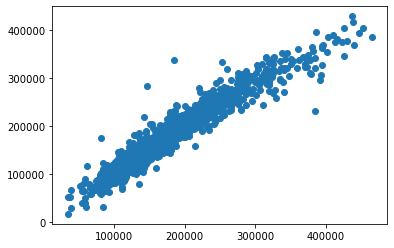

In [84]:
plt.scatter(y, model.predict(Xtrain4[selected]))